In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gradAd = pd.read_csv('Graduate Admissions.csv')
gradAd.drop('Serial No.',axis = 1,inplace = True)
gradAd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
def bootstrap(sample,runs):
    ls = []
    n = sample.shape[0]
    for _ in range(runs):
        sum = 0
        for i in range(n):
            r = np.floor(np.random.random()*n)
            sum += sample[r]
        ls.append(sum/n)
    #plt.hist(ls,bins = 100)
    ls.sort()
    return ls
def getbounds(ls,confidence):
    confidence /= 2
    n = len(ls)
    lb = int(np.floor(confidence * n)/100)
    ub = int(np.floor((100-confidence)*n/100))
    return ls[lb],ls[ub]

# **University Rating vs Chance of admission**

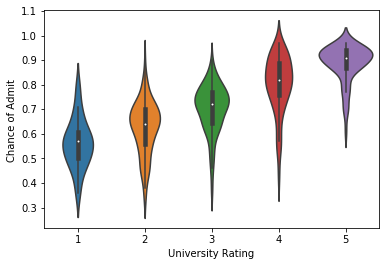

In [4]:
sns.violinplot(x = 'University Rating',y = 'Chance of Admit ',data = gradAd)

In [5]:
mid = gradAd['Chance of Admit '].groupby(gradAd['University Rating']).mean()
mid.index = range(5)
mid

0    0.562059
1    0.626111
2    0.702901
3    0.801619
4    0.888082
Name: Chance of Admit , dtype: float64

In [6]:
hb = []
lb = []
for i in range(5):
    temp = gradAd[gradAd['University Rating'] == i+1]
    temp.index = range(temp.shape[0])
    ls = bootstrap(temp['Chance of Admit '],5000)
    l,h = getbounds(ls,5)
    lb.append(l)
    hb.append(h)

In [7]:
lb

[0.5291176470588236,
 0.6066666666666671,
 0.6874074074074074,
 0.7788571428571426,
 0.8702739726027395]

In [8]:
hb

[0.5955882352941178,
 0.6448412698412697,
 0.7175308641975312,
 0.8235238095238093,
 0.9043835616438356]

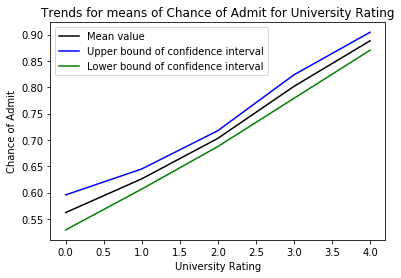

In [9]:
plt.title('Trends for means of Chance of Admit for University Rating')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.plot(mid,'black',hb,'blue',lb,'green')
plt.legend(('Mean value','Upper bound of confidence interval','Lower bound of confidence interval'))

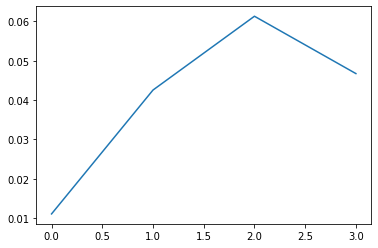

In [10]:
estimate = []
for i in range(4):
    estimate.append(lb[i+1] - hb[i])
plt.plot(estimate)

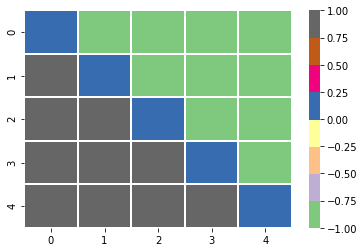

In [11]:
arr = np.zeros((5,5))
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if lb[i]>hb[j]:
            arr[i][j] = 1
        elif lb[j]>hb[i]:
            arr[i][j] = -1
        else:
            arr[i][j] = 0
sns.heatmap(data = arr,cmap = "Accent",linewidths = 1)